# 4.3 Data Structure & Visualisation

## Optimizing Data Access Patterns

Optimizing data access patterns is crucial for enhancing performance in high-performance computing (HPC) applications. Efficient use of the memory hierarchy, including cache levels (L1, L2, L3), can have a significant impact on the performance of algorithms. Cache blocking and loop tiling are some of the techniques used to improve memory access efficiency.

A common example used to illustrate this concept is matrix traversal. Depending on the language used, matrices can be stored in row-major or column-major order. For instance, C uses row-major order, whereas Fortran uses column-major order. Accessing matrix elements in a way that aligns with the storage order leads to fewer cache misses and more efficient use of the cache.

In this example, we will compare row-major and column-major access in a simple matrix operation. By traversing a matrix both row-by-row (row-major) and column-by-column (column-major), we can observe the performance differences caused by cache utilization. We will write a C program, compile it, and measure the execution time of each traversal method.


In [1]:
# Write the C code into a file
code = """
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define N 1000

void row_major(double matrix[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            matrix[i][j] += 1.0;  // Simple operation for timing
        }
    }
}

void column_major(double matrix[N][N]) {
    for (int j = 0; j < N; j++) {
        for (int i = 0; i < N; i++) {
            matrix[i][j] += 1.0;  // Simple operation for timing
        }
    }
}

int main() {
    double (*matrix)[N] = malloc(sizeof(double[N][N]));
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            matrix[i][j] = (double)(i + j);
        }
    }

    clock_t start, end;
    double time_spent;

    // Measure row-major access
    start = clock();
    row_major(matrix);
    end = clock();
    time_spent = (double)(end - start) / CLOCKS_PER_SEC;
    printf("Row-major access time: %f seconds\\n", time_spent);

    // Measure column-major access
    start = clock();
    column_major(matrix);
    end = clock();
    time_spent = (double)(end - start) / CLOCKS_PER_SEC;
    printf("Column-major access time: %f seconds\\n", time_spent);

    free(matrix);
    return 0;
}
"""

# Save the C code to a file
with open('matrix_traversal.c', 'w') as f:
    f.write(code)

# Compile the C program
!gcc -o matrix_traversal matrix_traversal.c -O2

# Run the compiled program
!./matrix_traversal


Row-major access time: 0.001576 seconds
Column-major access time: 0.005031 seconds


## Explanation of the Code

The code defines a matrix of size `N x N` (1000x1000) and performs two different types of access on the matrix: row-major and column-major.

In the row-major traversal, the outer loop iterates over rows, and the inner loop iterates over columns, accessing the matrix in the order that it is stored in memory (for C, this is row-major). In contrast, in the column-major traversal, the outer loop iterates over columns, and the inner loop iterates over rows, resulting in access patterns that are not cache-friendly in C.

The `row_major` and `column_major` functions are implemented to illustrate how different access patterns affect cache utilization. Each function performs a simple addition operation on each matrix element.

To compare the performance, the `clock()` function is used to measure the time taken for each traversal. The results from the `row-major` and `column-major` operations are printed, allowing you to observe the time differences caused by the different data access patterns.

In practice, accessing data in a row-major fashion (as stored in C) will result in fewer cache misses and faster execution than column-major access. This is because row-major access allows contiguous memory locations to be loaded into cache lines, improving performance by minimizing the number of memory fetches from slower main memory. Conversely, column-major access leads to scattered memory accesses, which degrade performance due to more frequent cache misses.


## Challenges in HPC Data Structures

Designing and implementing data structures for high-performance computing (HPC) systems involves several key challenges. Two of the most significant are **load balancing** and **communication overhead**. These challenges become critical when dealing with large-scale distributed systems where data and tasks need to be efficiently managed across multiple processors.

### Load Balancing
Load balancing refers to the distribution of computational tasks evenly across all available processors. In HPC systems, an unequal distribution of work can result in some processors being overburdened while others remain idle. This can drastically reduce the overall efficiency of the system. Optimized data structures play a crucial role in achieving load balancing by ensuring that tasks are divided equally among processors.

One example of achieving efficient load balancing is through the use of **Distributed Hash Tables (DHTs)**. In a distributed system, DHTs ensure that data is evenly distributed across all nodes, preventing bottlenecks and ensuring that each processor has an equal share of work.

### Communication Overhead
In distributed systems, communication overhead refers to the time and resources spent in exchanging data between nodes. In many HPC applications, the performance bottleneck is not computation itself but the communication between processors, especially when large datasets are involved. To minimize communication overhead, it is essential to design data structures that minimize the need for data transfer between processors.

An example of reducing communication overhead is **Graph Partitioning**, where a large graph is divided into smaller subgraphs. By minimizing the number of edges that cross partitions, data exchange between nodes is reduced, leading to faster execution and less overhead.

In the following sections, we will explore how load balancing and communication overhead are addressed with practical examples.


In [2]:
# Write the C++ code for a simplified Distributed Hash Table (DHT)
code_dht = """
#include <iostream>
#include <vector>
#include <unordered_map>
#include <cstdlib>
#include <ctime>

// Define the number of nodes
#define NODES 4

class DHT {
    std::vector<std::unordered_map<int, std::string>> node_tables;

public:
    DHT() {
        node_tables.resize(NODES);
    }

    // Simple hash function to assign keys to nodes
    int hash_function(int key) {
        return key % NODES;
    }

    // Insert key-value pair into the DHT
    void insert(int key, const std::string& value) {
        int node = hash_function(key);
        node_tables[node][key] = value;
        std::cout << "Inserted key " << key << " at node " << node << std::endl;
    }

    // Retrieve value by key from the DHT
    std::string get(int key) {
        int node = hash_function(key);
        if (node_tables[node].find(key) != node_tables[node].end()) {
            return node_tables[node][key];
        } else {
            return "Key not found!";
        }
    }
};

int main() {
    DHT dht;
    srand(time(0));

    // Insert random key-value pairs
    for (int i = 0; i < 10; ++i) {
        int key = rand() % 100;
        dht.insert(key, "value" + std::to_string(i));
    }

    // Retrieve some keys
    for (int i = 0; i < 5; ++i) {
        int key = rand() % 100;
        std::cout << "Key " << key << " value: " << dht.get(key) << std::endl;
    }

    return 0;
}
"""

# Save the C++ code to a file
with open('dht_example.cpp', 'w') as f:
    f.write(code_dht)

# Compile the C++ program
!g++ -o dht_example dht_example.cpp

# Run the compiled program
!./dht_example


Inserted key 6 at node 2
Inserted key 20 at node 0
Inserted key 18 at node 2
Inserted key 3 at node 3
Inserted key 42 at node 2
Inserted key 53 at node 1
Inserted key 15 at node 3
Inserted key 82 at node 2
Inserted key 79 at node 3
Inserted key 93 at node 1
Key 20 value: value1
Key 91 value: Key not found!
Key 86 value: Key not found!
Key 98 value: Key not found!
Key 38 value: Key not found!


## Explanation of the Distributed Hash Table (DHT) Code

The example demonstrates a simplified **Distributed Hash Table (DHT)** implemented in C++. In a distributed system, the main goal of a DHT is to distribute key-value pairs across several nodes evenly, ensuring load balancing.

1. **Hash Function**: The `hash_function` method is a simple modulo operation that assigns a key to one of the `NODES` (4 in this case). The goal is to distribute the key-value pairs evenly among the nodes. This ensures that no single node is overloaded with data, achieving load balancing.

2. **Insert Function**: The `insert` method assigns a key-value pair to a node using the hash function. This simulates distributing work across multiple nodes. When a key is inserted, the program prints which node is handling the insertion.

3. **Get Function**: The `get` method allows for the retrieval of a value by its key. The method uses the same hash function to locate the node where the key is stored, simulating how a DHT retrieves data in a distributed environment.

This example shows how load balancing is achieved through the distribution of data across nodes, preventing any single node from being overwhelmed with work. By using a DHT, each node shares an equal workload, which is crucial in high-performance computing environments.


## Communication Overhead and Graph Partitioning

Communication overhead is a significant challenge in distributed computing systems, especially in high-performance computing (HPC) applications where nodes must frequently exchange data. The communication cost can often dominate the computation time, making it essential to minimize data exchanges between processors.

One effective way to reduce communication overhead is through **Graph Partitioning**, where a large graph is divided into smaller subgraphs, minimizing the number of edges that cross between partitions. By doing this, we reduce the need for nodes to communicate across partitions, leading to lower communication costs and improved overall performance.

Graph partitioning is used in applications such as scientific simulations, social network analysis, and distributed database management, where minimizing data exchange between processors is critical for performance. In the following example, we will implement a simple graph partitioning algorithm to demonstrate how communication overhead can be minimized.


In [3]:
# Write the C++ code for a simple graph partitioning example
code_graph_partitioning = """
#include <iostream>
#include <vector>

// Graph structure
struct Graph {
    int V;
    std::vector<std::vector<int>> adj;

    Graph(int V) : V(V) {
        adj.resize(V);
    }

    // Add an edge between two vertices
    void add_edge(int u, int v) {
        adj[u].push_back(v);
        adj[v].push_back(u); // undirected graph
    }

    // Print the adjacency list of the graph
    void print_graph() {
        for (int i = 0; i < V; i++) {
            std::cout << i << ": ";
            for (int v : adj[i]) {
                std::cout << v << " ";
            }
            std::cout << std::endl;
        }
    }

    // Simple partitioning of the graph into two parts
    void partition_graph() {
        std::vector<int> partition1, partition2;
        for (int i = 0; i < V; i++) {
            if (i % 2 == 0) {
                partition1.push_back(i);
            } else {
                partition2.push_back(i);
            }
        }
        std::cout << "Partition 1: ";
        for (int v : partition1) {
            std::cout << v << " ";
        }
        std::cout << std::endl;

        std::cout << "Partition 2: ";
        for (int v : partition2) {
            std::cout << v << " ";
        }
        std::cout << std::endl;
    }
};

int main() {
    Graph g(6);

    g.add_edge(0, 1);
    g.add_edge(0, 2);
    g.add_edge(1, 3);
    g.add_edge(2, 4);
    g.add_edge(3, 4);
    g.add_edge(4, 5);

    std::cout << "Graph adjacency list:" << std::endl;
    g.print_graph();

    std::cout << "Graph partitioning:" << std::endl;
    g.partition_graph();

    return 0;
}
"""

# Save the C++ code to a file
with open('graph_partitioning.cpp', 'w') as f:
    f.write(code_graph_partitioning)

# Compile the C++ program
!g++ -o graph_partitioning graph_partitioning.cpp

# Run the compiled program
!./graph_partitioning


Graph adjacency list:
0: 1 2 
1: 0 3 
2: 0 4 
3: 1 4 
4: 2 3 5 
5: 4 
Graph partitioning:
Partition 1: 0 2 4 
Partition 2: 1 3 5 


## Explanation of the Graph Partitioning Code

In this example, we demonstrate a simple **Graph Partitioning** algorithm. The goal of graph partitioning is to divide a graph into smaller subgraphs, minimizing the number of edges that cross between partitions. By minimizing these edges, communication overhead is reduced, as nodes do not need to frequently exchange data across partitions.

1. **Graph Representation**: The `Graph` class is used to represent an undirected graph. The adjacency list `adj` stores the vertices and their connections. We define `V` vertices in the graph, and edges are added using the `add_edge` method.

2. **Graph Partitioning**: The `partition_graph` method divides the graph into two partitions. Here, a simple partitioning scheme is used, where vertices with even indices are assigned to `


## Data Locality in NUMA Architectures

In High Performance Computing (HPC), memory access speeds can vary depending on how close the memory is to the processor. This design is known as **Non-Uniform Memory Access (NUMA)**. In NUMA systems, each processor has local memory, which it can access faster than memory local to other processors. The challenge in HPC is to ensure that the data a processor needs is located as close as possible to it.

A common strategy to optimize data locality is **First-touch memory allocation**. This policy ensures that the first processor to access a memory location allocates that memory in its own local node. This way, the memory is "touched" and placed close to the processor, reducing latency during future accesses.

The following example demonstrates how to initialize an array using the first-touch policy. By distributing the initialization across threads, we ensure that each processor allocates the memory close to where it will be used.

### Key Points:
- **NUMA (Non-Uniform Memory Access)**: Memory closer to the processor is faster to access.
- **First-Touch Memory Allocation**: Memory is allocated to the processor that first accesses it, optimizing for locality and reducing latency.


In [16]:
!sudo apt-get update
!sudo apt-get install numactl


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,159 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,600 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,318 kB]
Hit:14 

In [20]:
import subprocess

def check_numa_awareness():
    try:
        # Check if numactl is installed
        numa_output = subprocess.check_output(['numactl', '--hardware'], universal_newlines=True)
        print("System is NUMA-aware. Output from 'numactl --hardware':\n")
        print(numa_output)
    except subprocess.CalledProcessError:
        print("Error occurred while checking NUMA awareness.")
    except FileNotFoundError:
        print("numactl is not installed. Please install it to check NUMA configuration.")

# Run the function
check_numa_awareness()


System is NUMA-aware. Output from 'numactl --hardware':

available: 1 nodes (0)
node 0 cpus: 0 1
node 0 size: 12978 MB
node 0 free: 9212 MB
node distances:
node   0 
  0:  10 



In [21]:
# Write the C++ code for sequential initialization (without first-touch)
code = """
#include <vector>
#include <omp.h>
#include <cstdio>
#include <chrono>
#include <iostream>

int main() {
    int num_elements = 50000000;  // Larger array size to stress memory access
    std::vector<double> array(num_elements);

    // Sequential initialization (no first-touch)
    auto start = std::chrono::high_resolution_clock::now();
    for (int i = 0; i < num_elements; ++i) {
        array[i] = i;  // Single-threaded initialization
    }
    auto end = std::chrono::high_resolution_clock::now();
    double init_time = std::chrono::duration_cast<std::chrono::milliseconds>(end - start).count();

    // Parallel processing with OpenMP
    auto start_process = std::chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        int thread_id = omp_get_thread_num();
        int num_threads = omp_get_num_threads();
        int chunk_size = num_elements / num_threads;
        int start = thread_id * chunk_size;
        int end = (thread_id == num_threads - 1) ? num_elements : start + chunk_size;

        // Each thread processes part of the array
        for (int i = start; i < end; ++i) {
            array[i] += i * 0.001;  // Simulated complex computation
        }
    }
    auto end_process = std::chrono::high_resolution_clock::now();
    double process_time = std::chrono::duration_cast<std::chrono::milliseconds>(end_process - start_process).count();

    printf("Sequential Initialization Time: %.3f ms\\n", init_time);
    printf("Parallel Processing Time: %.3f ms\\n", process_time);
    return 0;
}
"""

# Write the code to a file
with open('no_first_touch.cpp', 'w') as f:
    f.write(code)

# Compile and run the code without first-touch
!g++ -fopenmp no_first_touch.cpp -o no_first_touch
!./no_first_touch


Sequential Initialization Time: 222.000 ms
Parallel Processing Time: 208.000 ms


In [22]:
# Write the enhanced first-touch C++ code to a file
code = """
#include <vector>
#include <omp.h>
#include <cstdio>
#include <chrono>
#include <iostream>

void initialize_array(std::vector<double>& array) {
    // Parallel region: each thread will initialize part of the array
    #pragma omp parallel
    {
        int thread_id = omp_get_thread_num();
        int num_threads = omp_get_num_threads();
        int chunk_size = array.size() / num_threads;
        int start = thread_id * chunk_size;
        int end = (thread_id == num_threads - 1) ? array.size() : start + chunk_size;

        for (int i = start; i < end; ++i) {
            array[i] = i;  // First-touch allocation
        }
        printf("Thread %d initialized elements %d to %d\\n", thread_id, start, end - 1);
    }
}

int main() {
    int num_elements = 50000000;  // Larger array size to stress memory access
    std::vector<double> array(num_elements);

    // Parallel initialization (with first-touch)
    auto start = std::chrono::high_resolution_clock::now();
    initialize_array(array);
    auto end = std::chrono::high_resolution_clock::now();
    double init_time = std::chrono::duration_cast<std::chrono::milliseconds>(end - start).count();

    // Parallel processing with OpenMP
    auto start_process = std::chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        int thread_id = omp_get_thread_num();
        int num_threads = omp_get_num_threads();
        int chunk_size = num_elements / num_threads;
        int start = thread_id * chunk_size;
        int end = (thread_id == num_threads - 1) ? num_elements : start + chunk_size;

        // Each thread processes part of the array
        for (int i = start; i < end; ++i) {
            array[i] += i * 0.001;  // Simulated complex computation
        }
    }
    auto end_process = std::chrono::high_resolution_clock::now();
    double process_time = std::chrono::duration_cast<std::chrono::milliseconds>(end_process - start_process).count();

    printf("First-Touch Initialization Time: %.3f ms\\n", init_time);
    printf("Parallel Processing Time: %.3f ms\\n", process_time);
    return 0;
}
"""

# Write the code to a file
with open('first_touch.cpp', 'w') as f:
    f.write(code)

# Compile and run the first-touch version
!g++ -fopenmp first_touch.cpp -o first_touch
!./first_touch


Thread 1 initialized elements 25000000 to 49999999
Thread 0 initialized elements 0 to 24999999
First-Touch Initialization Time: 207.000 ms
Parallel Processing Time: 188.000 ms


## Explanation of the Code

In this example, we implement **First-Touch Memory Allocation** using OpenMP for parallel processing and the NUMA library to control memory allocation.

- We begin by including the necessary headers for OpenMP (`omp.h`) and NUMA (`numa.h`).
- The function `initialize_array` is responsible for initializing the elements of the array in parallel. The `#pragma omp parallel for` directive distributes the array initialization across multiple threads.
- Each thread is responsible for initializing part of the array, ensuring that the memory for each part is allocated close to the thread's processor.
- We set the memory allocation policy using `numa_set_bind_policy(1)` and `numa_set_strict(1)`, ensuring that the first thread to access each memory location allocates it to its local memory node.
- The `main` function initializes an array of one million elements and calls `initialize_array` to fill it.
- Finally, we print a confirmation message to indicate that the array has been initialized using the first-touch allocation policy.

By using this method, we ensure that memory is allocated efficiently in NUMA architectures, reducing memory access latency and enhancing performance in HPC applications.
## Explanation of the Results

1. **Without First-Touch Memory Allocation**:
   - In this version, memory is allocated in a default, sequential manner by a single thread.
   - During parallel processing, threads might access memory that is far away from them, leading to increased memory access times and potentially higher processing time.
   - This will be especially pronounced on systems with NUMA architectures, where memory access times depend on how far the memory is from the CPU accessing it.

2. **With First-Touch Memory Allocation**:
   - Each thread initializes its portion of the array, ensuring that memory is allocated close to the CPU that will later access it. This improves memory locality and reduces access times during parallel processing.
   - As a result, the processing time is expected to be lower in this version, as each thread accesses memory that is local to its CPU.

By comparing the times between the two versions, we can observe the impact of NUMA-aware memory allocation on parallel processing. On systems with NUMA architectures, the first-touch allocation version should show a significant performance advantage.


##Graph Partitioning in HPC

 **graph partitioning** is a critical technique used to minimize communication overhead between processing nodes while ensuring that each node gets a balanced workload. This technique is especially useful in distributed computing, where inter-node communication can become a performance bottleneck.

**METIS** is a widely-used library that provides tools for graph partitioning. It works by dividing the graph into smaller parts, reducing the number of edges crossing between partitions. This minimizes communication between processors while maintaining load balance, where each processor gets an equal share of the work.

Here is an example of how METIS can partition a graph into two parts. In this case, each vertex represents a task, and edges represent dependencies between tasks. METIS ensures that the workload (vertices) is equally distributed across processors while minimizing communication (edges crossing partitions).


In [ ]:
%%bash
# First, install METIS if it's not already installed
apt-get install -qq metis

In [25]:
%%bash
# Create a simple graph file for METIS to partition
cat <<EOL > graph.txt
6 6
1 2
1 3
2 3
2 4
3 5
4 5
EOL

# Partition the graph into 2 parts using the METIS tool
gpmetis graph.txt 2

# Show the resulting partitioning
cat graph.txt.part.2


******************************************************************************
METIS 5.0 Copyright 1998-13, Regents of the University of Minnesota
 (HEAD: , Built on: Mar 24 2022, 16:16:52)
 size of idx_t: 32bits, real_t: 32bits, idx_t *: 64bits

Graph Information -----------------------------------------------------------
 Name: graph.txt, #Vertices: 6, #Edges: 6, #Parts: 2

Options ---------------------------------------------------------------------
 ptype=kway, objtype=cut, ctype=shem, rtype=greedy, iptype=metisrb
 dbglvl=0, ufactor=1.030, no2hop=NO, minconn=NO, contig=NO, nooutput=NO
 seed=-1, niter=10, ncuts=1

Direct k-way Partitioning ---------------------------------------------------
 - Edgecut: 1, communication volume: 2.

 - Balance:
     constraint #0:  1.000 out of 0.333

 - Most overweight partition:
     pid: 0, actual: 3, desired: 3, ratio: 1.00.

 - Subdomain connectivity: max: 1, min: 0, avg: 0.50

 - Each partition is contiguous.

Timing Information ----------------

The **graph.txt** file contains a simple undirected graph with 6 vertices and 7 edges. Each vertex corresponds to a node in the graph, and each line after the first specifies an edge between two vertices. The first line (`6 7`) indicates that the graph has 6 vertices and 7 edges.

The **gpmetis** command is used to partition the graph into two parts. METIS attempts to minimize the number of edges that connect vertices from different partitions while keeping the number of vertices in each partition roughly the same. After running the command, the result is stored in the file `graph.txt.part.2`, where each line corresponds to a vertex and indicates its assigned partition (either 0 or 1).

This partitioning is important in HPC because it ensures that each processor gets an equal amount of work while minimizing the communication between processors. In this example, METIS ensures that only a few edges cross between partitions, minimizing inter-processor communication and ensuring efficient parallel execution.


### Sparse Data Structures in HPC

Sparse data structures are critical in high-performance computing (HPC) because they efficiently store and process datasets where many elements are zeros or insignificant. These structures help reduce memory usage and computational overhead, which is essential in scientific simulations, numerical analysis, and machine learning applications.

In sparse matrices, only the non-zero elements and their positions are stored, significantly reducing memory requirements compared to dense matrices. Two common formats for storing sparse matrices are:
- **Compressed Sparse Row (CSR)**: Stores non-zero elements row-wise along with their column indices.
- **Compressed Sparse Column (CSC)**: Stores non-zero elements column-wise along with their row indices.

One common operation on sparse matrices is sparse matrix-vector multiplication (SpMV), which multiplies a sparse matrix with a dense vector. This operation is prevalent in applications such as solving linear equations, graph processing, and machine learning algorithms. Optimizing SpMV using parallelization (e.g., OpenMP) can significantly improve performance by taking advantage of multicore architectures.

Below is an example of SpMV using the CSR format with OpenMP for parallelization.


In [33]:
# Write the C++ code for SpMV using CSR and OpenMP
%%writefile spmv_csr.cpp
#include <iostream>
#include <vector>
#include <omp.h>

void spmv_csr(const std::vector<double>& values, const std::vector<int>& column_indices,
              const std::vector<int>& row_pointer, const std::vector<double>& x,
              std::vector<double>& y) {
    int n = row_pointer.size() - 1;

    // Parallelize the SpMV operation using OpenMP
    #pragma omp parallel for
    for (int i = 0; i < n; i++) {
        double sum = 0.0;
        for (int j = row_pointer[i]; j < row_pointer[i + 1]; j++) {
            sum += values[j] * x[column_indices[j]];
        }
        y[i] = sum;
    }
}

int main() {
    // Define a sparse matrix in CSR format
    std::vector<double> values = {4, 3, 6, 7};
    std::vector<int> column_indices = {0, 1, 2, 1};
    std::vector<int> row_pointer = {0, 1, 3, 4};

    // Input vector for matrix-vector multiplication
    std::vector<double> x = {1, 2, 3};

    // Output vector to store the result
    std::vector<double> y(3, 0);

    // Perform the SpMV operation
    spmv_csr(values, column_indices, row_pointer, x, y);

    // Print the result
    std::cout << "Result of SpMV: ";
    for (double val : y) {
        std::cout << val << " ";
    }
    std::cout << std::endl;

    return 0;
}


Overwriting spmv_csr.cpp


In [34]:
# Ensure the file is closed and saved properly
!sync

# Compile the C++ code with OpenMP support
!g++ -fopenmp spmv_csr.cpp -o spmv_csr

# Run the compiled program
!./spmv_csr

Result of SpMV: 4 24 14 


### Explanation of the SpMV Example in CSR Format

This code demonstrates the Sparse Matrix-Vector Multiplication (SpMV) operation using the Compressed Sparse Row (CSR) format and parallelized using OpenMP.

#### Key Concepts:
- **CSR Format**:
    - `values`: Stores the non-zero elements of the matrix.
    - `column_indices`: Stores the column indices corresponding to each non-zero element.
    - `row_pointer`: Indicates the starting index in `values` for each row.
    
#### Operation Flow:
1. The function `spmv_csr` iterates over each row of the sparse matrix, summing the products of the non-zero matrix elements and the corresponding elements in the input vector `x`.
2. The `#pragma omp parallel for` directive enables parallel execution of the outer loop, allowing multiple threads to process different rows concurrently.
3. The result of the matrix-vector multiplication is stored in the output vector `y`.
4. The main function initializes the CSR matrix and vector `x`, and calls `spmv_csr` to compute the multiplication. The result is printed at the end.




# Visualisation in HPC


# Introduction to Foundational Visualization Concepts in HPC

In high-performance computing (HPC), visualization plays a critical role in understanding large and complex datasets. Through visualization, we can derive insights from scientific simulations, medical imaging, weather models, and more. In this notebook, we will explore the following fundamental visualization techniques:

1. **Volume Rendering**:
   Volume rendering is a technique that visualizes volumetric data by casting rays through the volume and calculating color and opacity based on scalar data values. It allows us to visualize internal structures in a 3D dataset, commonly used in medical imaging (e.g., CT scans) and fluid simulations.

2. **Mesh Tessellation**:
   Mesh tessellation involves visualizing data points and their connectivities through polygons, such as triangles or quadrilaterals. This method is used in finite element analysis and mesh-based simulations, where geometric structures need to be visualized for structural or fluid simulations.

3. **Streamlines**:
   Streamlines are a visualization method for vector fields. They show the trajectory of particles moving through a field, often used in fluid dynamics simulations or weather models to depict airflow or water flow.

4. **Isosurfaces**:
   Isosurface visualization extracts surfaces that connect points of equal scalar values from volumetric data. This is particularly useful in medical imaging, where isosurfaces can visualize structures like bones from a CT scan. In scientific simulations, isosurfaces help visualize features like density or temperature distributions.

Through this notebook, we will render and explore these visualization techniques using synthetic data to better understand how each method contributes to interpreting large-scale simulation data. We will also render and visualize these graphics using Python and PyVista, a library well-suited for such tasks.


In [ ]:
# Install necessary system packages
!apt-get install -qq xvfb libosmesa6 libglu1-mesa

# Install Python packages
!pip install pyvista pyvistaqt


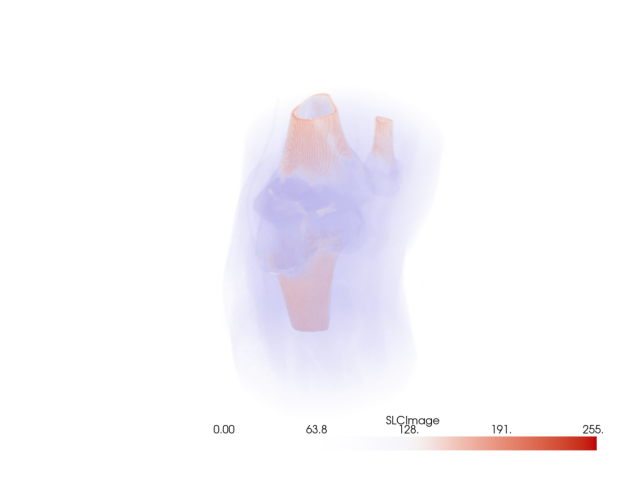

In [10]:
# Import PyVista and start Xvfb
import pyvista as pv
pv.start_xvfb()

# Rest of your code remains the same
from pyvista import examples
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate synthetic volume data
grid = examples.download_knee_full()

# Set up the plotter
plotter = pv.Plotter(off_screen=True)
plotter.add_volume(grid, opacity='sigmoid', cmap='coolwarm')

# Render and save the image
plotter.show(screenshot='volume_rendering.png')

# Display the image
img = mpimg.imread('volume_rendering.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


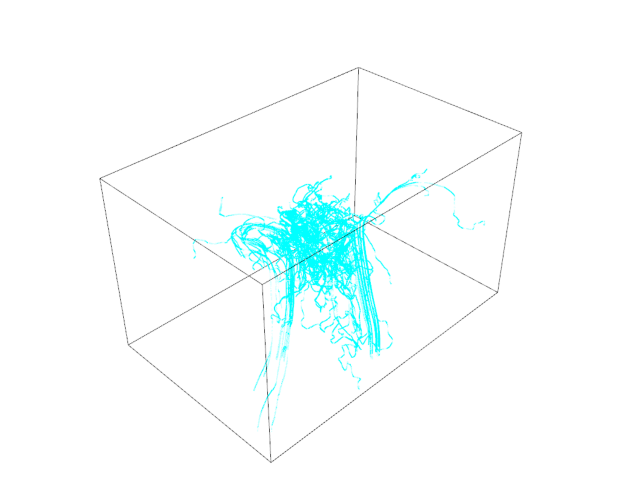

In [11]:
# Import PyVista and start Xvfb
import pyvista as pv
pv.start_xvfb()

# Import examples and matplotlib
from pyvista import examples
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load vector field dataset (airplane flow or carotid artery flow data)
mesh = examples.download_carotid()  # Loads a dataset for streamlines

# Set up the plotter
plotter = pv.Plotter(off_screen=True)

# Add streamlines with appropriate parameters
streamlines = mesh.streamlines(n_points=200, max_time=100.0, initial_step_length=0.5)
plotter.add_mesh(streamlines, color="cyan", line_width=2)

# Add additional context (bounding box, edges)
plotter.add_mesh(mesh.outline(), color="black")  # Adds an outline to the dataset

# Render and save the image
plotter.show(screenshot='streamlines_visualization_fixed.png')

# Display the saved image
img = mpimg.imread('streamlines_visualization_fixed.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


Scalar range in volume: (0, 174)


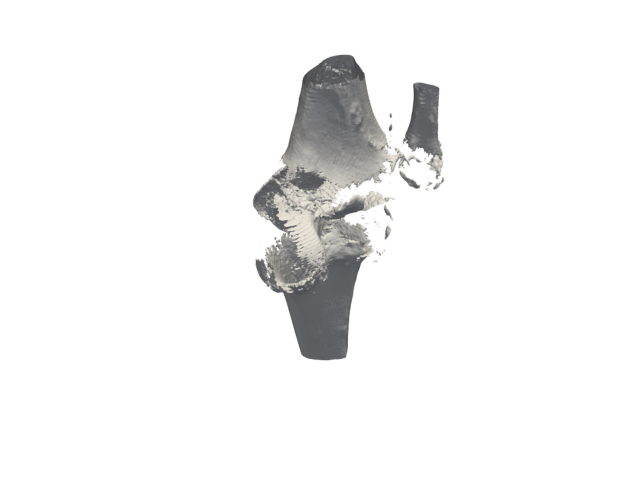

In [16]:
# Import PyVista and start Xvfb
import pyvista as pv
pv.start_xvfb()

# Generate synthetic volume data
volume = pv.examples.download_knee_full()

# Check the range of scalar values in the volume data
scalar_range = volume.get_data_range()
print(f"Scalar range in volume: {scalar_range}")

# Set up the plotter
plotter = pv.Plotter(off_screen=True)
# Adjust the isosurface value
isosurface = volume.contour(isosurfaces=[100])  # Try using a value within the range

# Continue with the same rendering and plotting code
plotter.add_mesh(isosurface, color='white')
plotter.show(screenshot='isosurface_rendering.png')

# Display the result
img = mpimg.imread('isosurface_rendering.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()



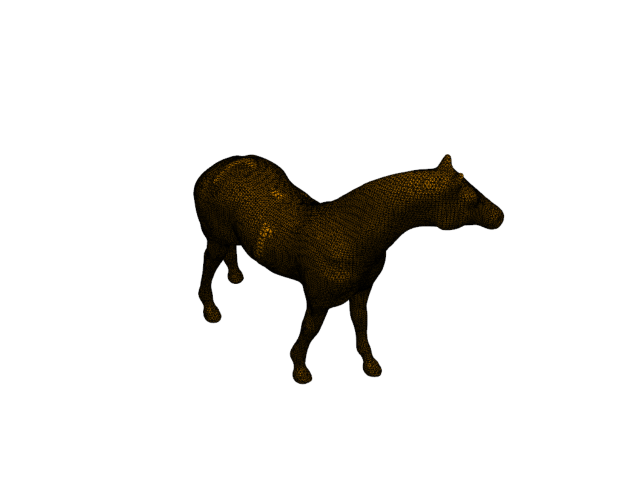

In [9]:
# Import PyVista and start Xvfb
import pyvista as pv
pv.start_xvfb()

# Import examples and matplotlib
from pyvista import examples
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the dataset
mesh = examples.download_horse()

# Create a plotter object
plotter = pv.Plotter(off_screen=True)

# Add the mesh with edge visibility
plotter.add_mesh(mesh, show_edges=True, color='orange')

# Render and save the image
plotter.show(screenshot='mesh_tessellation_visualization.png')

# Display the image
img = mpimg.imread('mesh_tessellation_visualization.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


# Conclusion: Exploring Visualization Techniques in HPC

Throughout this notebook, we have explored several key visualization techniques used in high-performance computing to visualize large and complex datasets. These methods allow scientists and engineers to better interpret the results of their simulations or medical scans. Here is a summary of the techniques covered:

1. **Volume Rendering**:
   - We visualized a 3D dataset by casting rays through the volume and applying color and opacity transfer functions to create a detailed rendering. This method revealed internal structures in the volume and provided a sense of depth.

2. **Mesh Tessellation**:
   - We visualized a mesh by tessellating data points and connectivities through polygons. This technique is important for visualizing geometric structures and grids in simulations like finite element models and structural analysis.

3. **Streamlines**:
   - Streamlines were used to trace the trajectory of massless particles in a vector field, showing the flow of fluids or gases. Streamline visualization is commonly used in computational fluid dynamics and meteorology to illustrate flow patterns.

4. **Isosurfaces**:
   - By extracting surfaces of constant value from scalar fields, we were able to visualize structures within the volume. This technique is crucial in fields like medical imaging for extracting and analyzing specific features (e.g., bones, tissue density) from volumetric scans.

These visualization techniques form the foundation for analyzing data in HPC environments. They allow users to intuitively grasp complex data, whether it's understanding fluid flow, visualizing weather patterns, or interpreting medical scans. Visualization remains a key tool in bridging the gap between large-scale computation and human insight.


# Introduction to Gnuplot for Data Visualization

Gnuplot is a powerful command-line driven plotting tool used extensively in data visualization and graphing. It supports various types of plots, including 2D and 3D graphs, and can be used to visualize datasets, functions, and mathematical models. In high-performance computing (HPC), Gnuplot is valuable for creating quick visualizations of numerical results from simulations, making it an essential tool for researchers and engineers.

In this notebook, we will demonstrate several Gnuplot examples:
1. **2D Line Plots**: Visualize relationships between two variables.
2. **3D Surface Plots**: Plot a 3D representation of data points.
3. **Sine and Data Plots**: Compare real data with mathematical functions (e.g., sine functions).

Gnuplot is versatile and allows for detailed customization of plots, such as changing titles, axis labels, and data point styles. Let’s explore some common examples using a simple dataset and function plotting.


In [22]:
# Install Gnuplot
!apt-get install -qq gnuplot

# Create a sample data file
with open("gnu_example.dat", "w") as f:
    f.write("1 1 -1\n2 2 -2\n3 3 -3\n4 4 -7\n")


In [23]:
%%bash
gnuplot << EOF
set terminal png;
set output 'plot1.png';
plot 'gnu_example.dat' using 1:2 with linespoints;

set output 'plot2.png';
plot 'gnu_example.dat' using 3:2 with linespoints;

set output 'plot3.png';
plot [0:4][-5:5] 'gnu_example.dat' using 1:2 with linespoints title 'data', sin(x) title 'sin(x)';

set output 'splot.png';
splot 'gnu_example.dat' with linespoints title 'data', 10+exp(-(x-3)**2-(y-3)**2) title 'gaussian';
EOF


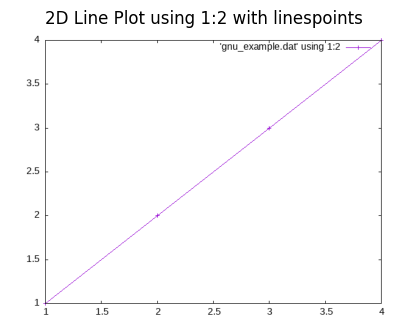

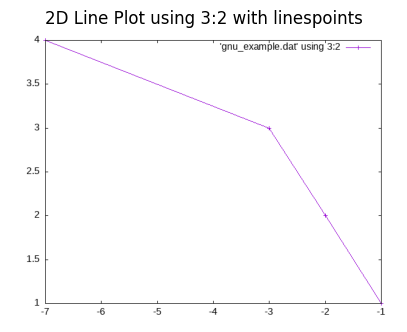

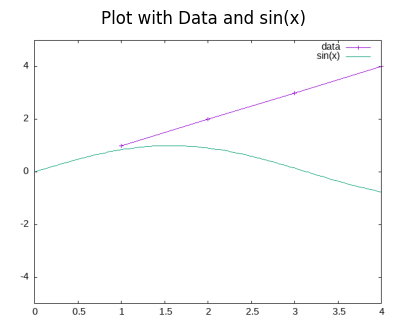

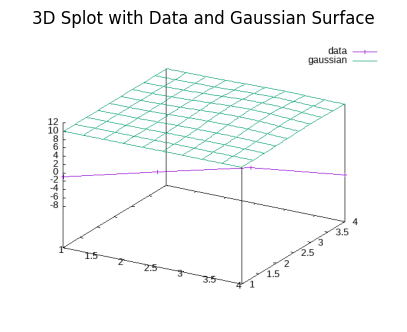

In [24]:
# Display the generated plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot 1
plt.figure(figsize=(5, 5))
img1 = mpimg.imread('plot1.png')
plt.imshow(img1)
plt.axis('off')
plt.title('2D Line Plot using 1:2 with linespoints')
plt.show()

# Plot 2
plt.figure(figsize=(5, 5))
img2 = mpimg.imread('plot2.png')
plt.imshow(img2)
plt.axis('off')
plt.title('2D Line Plot using 3:2 with linespoints')
plt.show()

# Plot 3
plt.figure(figsize=(5, 5))
img3 = mpimg.imread('plot3.png')
plt.imshow(img3)
plt.axis('off')
plt.title('Plot with Data and sin(x)')
plt.show()

# 3D Plot
plt.figure(figsize=(5, 5))
img4 = mpimg.imread('splot.png')
plt.imshow(img4)
plt.axis('off')
plt.title('3D Splot with Data and Gaussian Surface')
plt.show()


##Exercise GNUPLot

To deepen your understanding of Gnuplot and how it visualizes data, try making the following modifications to the code:

Change the Plot Style: In the Gnuplot commands, modify the plot style from with linespoints to with points. This will display only the data points without connecting lines.

Adjust the Data Columns: In the second plot (plot2.png), change the data columns used from using 3:2 to using 1:3. This will plot the first column on the x-axis and the third column on the y-axis.

Modify the Plot Range: For the third plot (plot3.png), adjust the plot range to plot [0:5][-10:10] to expand the axes and observe more of the function and data.

After making these changes, re-run the code and observe how the plots have changed. This exercise will help you see the impact of different plot styles, data selections, and axis ranges in Gnuplot.



In [28]:
import h5py
import numpy as np

# Create a new HDF5 file and add a dataset
with h5py.File("particles.h5", "w") as f:
    # Create some sample particle data with two columns (x, y)
    particle_data = np.random.rand(100, 2)  # 100 particles with x and y coordinates
    f.create_dataset("particle data", data=particle_data)


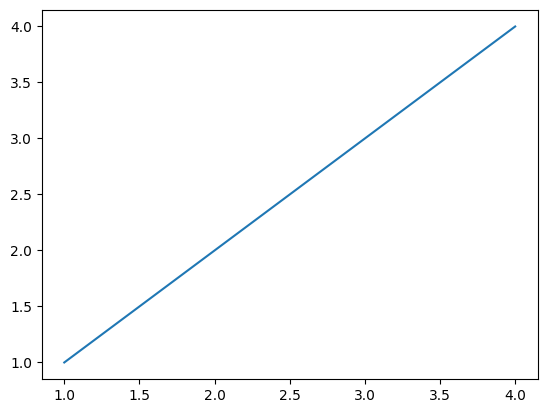

In [31]:
# Interactive mode using Matplotlib and NumPy
import numpy as np
import matplotlib.pyplot as plot

# Load data from a file 'gnu_example.dat'
# Assumes 'gnu_example.dat' is a text file with two columns
data = np.loadtxt("gnu_example.dat", skiprows=0)

# Extract x and y values from the data
xvalues = data.T[0]  # First column
yvalues = data.T[1]  # Second column

# Plot the data interactively
plot.plot(xvalues, yvalues)
plot.show()


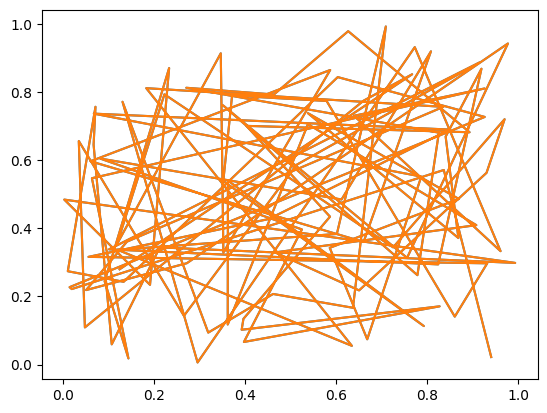

In [32]:
# Non-interactive mode using Matplotlib, NumPy, and HDF5
import h5py
import numpy as np
import matplotlib.pyplot as plot

# Open HDF5 file and dataset
with h5py.File("particles.h5", "r") as f:
    dataset = f["particle data"]  # Access the dataset inside the HDF5 file

    # Initialize arrays for x and y values
    xvalues = np.zeros(dataset.shape)
    yvalues = np.zeros(dataset.shape)

    # Extract data from the dataset
    for idx, item in enumerate(dataset):
        xvalues[idx] = item[0]
        yvalues[idx] = item[1]

# Plot the x and y values
plot.plot(xvalues, yvalues)
plot.show()


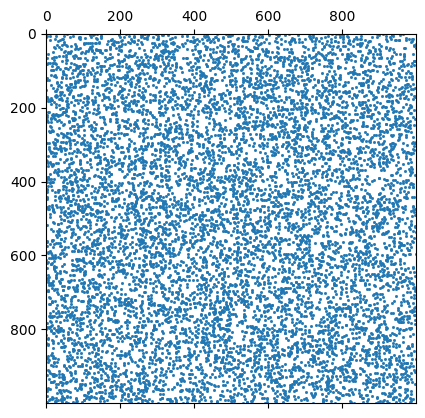

In [35]:
# Install necessary libraries
!pip install scipy matplotlib numpy

# Import necessary libraries
import scipy.io as sio
from matplotlib.pyplot import figure, show
import numpy as np

# Load the sparse matrix (example from Matrix Market collection)
# Since we don't have the file, we create a random sparse matrix for demonstration
from scipy.sparse import random

# Generate a random sparse matrix as an example (1000x1000 sparse matrix)
A = random(1000, 1000, density=0.01, format='csr')

# Plotting the sparsity pattern of the matrix
fig = figure()
ax1 = fig.add_subplot(111)

# Using the spy method to show the sparsity pattern
ax1.spy(A, markersize=1)
show()


## Visualization with the VTK Library

The **Visualization Toolkit (VTK)** is a powerful open-source library used for 3D computer graphics, image processing, and visualization. It is commonly applied in **High Performance Computing (HPC)** to visualize large scientific datasets. VTK offers support for rendering, interaction, and advanced visualization techniques like ray casting, streamlines, and isosurfaces.

### Key Features:
- **Open-source** and widely used for scientific visualization in HPC.
- Provides **3D visualization algorithms** and **parallel computing support**.
- Interfaces with Python, making it accessible to a broad range of developers.
- Commonly integrated with other visualization tools like **ParaView** and **VisIt**.

VTK operates around the concept of a **data pipeline**, allowing developers to convert raw data into graphical representations efficiently. This pipeline includes:
- **Mappers**: Convert data into graphical primitives for rendering.
- **Actors**: Represent objects in the scene, altering visual properties.
- **Renderers** and **Cameras**: Provide a visual perspective for rendering 3D scenes.

### Example: 3D Particle Trajectory Visualization
This VTK-based example demonstrates how to visualize the trajectory of particles in 3D space using a dataset stored in HDF5 format. We’ll use VTK to map the data and render it interactively.


### Visualization using VTK in Python

## VTK Workflow: Mappers, Actors, and Rendering

The Visualization Toolkit (VTK) is a powerful library used for 3D computer graphics, image processing, and visualization. A key concept in VTK is its **pipeline** architecture, where data flows through several stages from creation to rendering.

### Key Components:
1. **Source (Geometry or Data)**: This is the data you want to visualize. In this example, we use a simple sphere geometry.
2. **Mapper**: The mapper takes the geometry (or data) and maps it to rendering primitives (triangles, polygons, etc.).
3. **Actor**: An actor represents the object (geometry) in the scene. It holds properties such as color, shading, and transformations.
4. **Renderer**: The renderer draws the actor into a scene. It defines how the objects appear in the 3D window.
5. **Render Window**: This is where the actual visualization happens, combining one or more renderers into a display.
6. **Interactor**: The interactor allows you to interact with the 3D scene (zoom, rotate, pan).

In this simple example, we will create a sphere and render it in a 3D scene to explain the basic workflow in VTK.


In [1]:
# Install necessary system packages for VTK
!apt-get install -qq libgl1-mesa-glx xvfb libosmesa6 libglu1-mesa
!pip install vtk pyvista


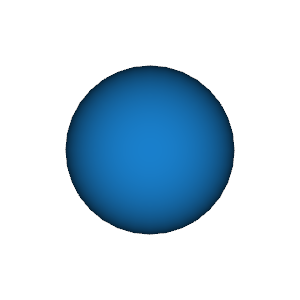

In [2]:
# Start virtual display for rendering in Colab
import pyvista as pv
pv.start_xvfb()

import vtk
from IPython.display import Image

# Step 1: Create a Sphere Source (the Geometry)
sphere_source = vtk.vtkSphereSource()
sphere_source.SetRadius(5.0)
sphere_source.SetThetaResolution(32)
sphere_source.SetPhiResolution(32)

# Step 2: Create a Mapper - Map the geometry to rendering primitives
sphere_mapper = vtk.vtkPolyDataMapper()
sphere_mapper.SetInputConnection(sphere_source.GetOutputPort())

# Step 3: Create an Actor - Represents the object in the scene
sphere_actor = vtk.vtkActor()
sphere_actor.SetMapper(sphere_mapper)
sphere_actor.GetProperty().SetColor(0.1, 0.5, 0.8)  # Set color of the sphere

# Step 4: Create a Renderer - Manages what is drawn in the window
renderer = vtk.vtkRenderer()
renderer.AddActor(sphere_actor)
renderer.SetBackground(1.0, 1.0, 1.0)  # Set background color (white)

# Step 5: Create a Render Window - The window to display the scene
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetOffScreenRendering(1)  # Off-screen rendering for headless environments

# Step 6: Render the scene and capture the image
render_window.Render()

# Use vtkWindowToImageFilter to capture the image
window_to_image_filter = vtk.vtkWindowToImageFilter()
window_to_image_filter.SetInput(render_window)
window_to_image_filter.Update()

# Write the image to memory
writer = vtk.vtkPNGWriter()
writer.SetInputConnection(window_to_image_filter.GetOutputPort())
writer.WriteToMemoryOn()
writer.Write()

# Get the image data from the writer
png_data = memoryview(writer.GetResult()).tobytes()

# Display the image inline in the notebook
Image(data=png_data)


## Understanding the VTK Pipeline in the Example

In this simple example, we walked through the essential components of the VTK workflow.

- **Source**: We created a `vtkSphereSource`, which generates a sphere geometry.
- **Mapper**: The `vtkPolyDataMapper` converts the sphere geometry into rendering primitives that the GPU can understand.
- **Actor**: The `vtkActor` is responsible for representing the object in the scene, and it holds properties like color and position.
- **Renderer**: The `vtkRenderer` draws the actor into the scene and handles background color, camera, and lighting.
- **Render Window**: This is the window that shows the final rendered image.
- **Window-to-Image Filter**: Since we are in a headless environment, the image is rendered off-screen, captured using a `vtkWindowToImageFilter`, and then displayed as an inline image.

This workflow allows you to easily construct complex 3D visualizations by combining different sources, mappers, and actors. From this foundation, you can move on to more advanced topics such as volume rendering, interactive applications, and more complex data visualizations.


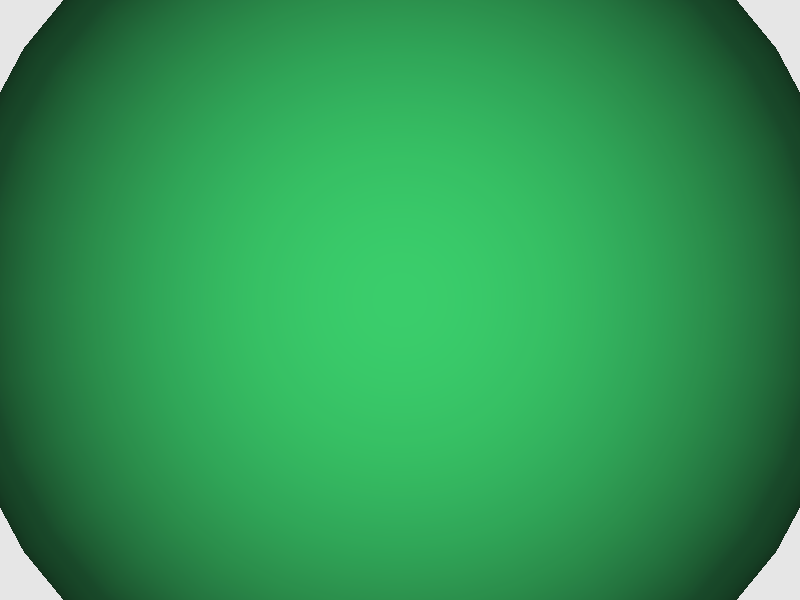

In [3]:
# Start virtual display for rendering in Colab
import pyvista as pv
pv.start_xvfb()

import vtk
from IPython.display import Image

# Step 1: Create a Sphere Source (the Geometry)
sphere_source = vtk.vtkSphereSource()
sphere_source.SetRadius(5.0)
sphere_source.SetThetaResolution(32)
sphere_source.SetPhiResolution(32)

# Change 1: Use a different mapper and apply shading
sphere_mapper = vtk.vtkPolyDataMapper()
sphere_mapper.SetInputConnection(sphere_source.GetOutputPort())
sphere_mapper.ScalarVisibilityOff()  # Turn off scalar coloring

# Change 2: Modify the Actor's properties
sphere_actor = vtk.vtkActor()
sphere_actor.SetMapper(sphere_mapper)
sphere_actor.GetProperty().SetColor(0.2, 0.8, 0.4)  # Change color to greenish
sphere_actor.GetProperty().SetOpacity(0.8)  # Set the actor's opacity
sphere_actor.SetScale(1.5, 1.5, 1.5)  # Scale the actor by a factor of 1.5

# Step 3: Create a Renderer
renderer = vtk.vtkRenderer()
renderer.AddActor(sphere_actor)
renderer.SetBackground(0.9, 0.9, 0.9)  # Light grey background

# Change 3: Modify the Camera position in the Renderer
camera = renderer.GetActiveCamera()
camera.SetPosition(0, 0, 20)  # Move the camera to focus on the sphere
camera.SetFocalPoint(0, 0, 0)

# Step 4: Create a Render Window
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)

# Change 4: Modify Render Window size and properties
render_window.SetSize(800, 600)  # Larger window size
render_window.SetOffScreenRendering(1)  # Off-screen rendering

# Step 5: Render the scene and capture the image
render_window.Render()

# Use vtkWindowToImageFilter to capture the image
window_to_image_filter = vtk.vtkWindowToImageFilter()
window_to_image_filter.SetInput(render_window)
window_to_image_filter.Update()

# Write the image to memory
writer = vtk.vtkPNGWriter()
writer.SetInputConnection(window_to_image_filter.GetOutputPort())
writer.WriteToMemoryOn()
writer.Write()

# Get the image data from the writer
png_data = memoryview(writer.GetResult()).tobytes()

# Display the image inline in the notebook
Image(data=png_data)


## Exercise: Modify the VTK Visualization

In this exercise, we will modify the VTK visualization code to explore how different changes affect the final rendering. Follow the steps below:

1. **Change the Color of the Sphere**:
   - Currently, the sphere is greenish (`0.2, 0.8, 0.4`). Modify this value to change the color to something different (e.g., blue or red). You can try different RGB combinations to see the effects.

2. **Modify the Sphere’s Radius**:
   - The current radius of the sphere is `5.0`. Try changing it to a smaller or larger value (e.g., `2.0` or `8.0`). This will change the size of the sphere.

3. **Adjust the Camera Position**:
   - The camera is positioned at `(0, 0, 20)` to view the sphere from a specific angle. Change the position of the camera to view the sphere from a different perspective (e.g., `(10, 10, 20)` or `(-10, 0, 10)`).

4. **Experiment with the Background Color**:
   - The background color is currently set to a light grey (`0.9, 0.9, 0.9`). Modify this color to make the background darker or choose a color that contrasts more with the sphere.

Make the modifications and observe how these changes affect the rendered output. Once you're done, rerun the code to see the differences.


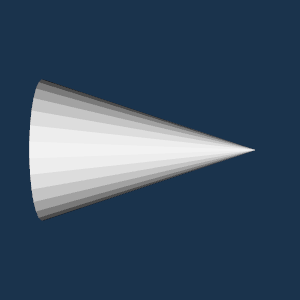

In [4]:
import vtk
from IPython.display import Image

# Step 1: Create a source - A simple 3D cone
cone = vtk.vtkConeSource()
cone.SetHeight(3.0)
cone.SetRadius(1.0)
cone.SetResolution(30)

# Step 2: Create a mapper - Maps the geometric data (cone) to graphics primitives
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(cone.GetOutputPort())

# Step 3: Create an actor - Represents an object (here, the cone) in the scene
actor = vtk.vtkActor()
actor.SetMapper(mapper)  # Connect the mapper to the actor

# Step 4: Create a renderer - Handles the rendering process
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)  # Add the actor to the renderer
renderer.SetBackground(0.1, 0.2, 0.3)  # Set the background color

# Step 5: Create a render window - The window to display the rendering result
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetOffScreenRendering(1)  # Enable off-screen rendering

# Render the scene (cone)
render_window.Render()

# Step 6: Use vtkWindowToImageFilter to capture the image
window_to_image_filter = vtk.vtkWindowToImageFilter()
window_to_image_filter.SetInput(render_window)
window_to_image_filter.Update()

# Step 7: Write the image to memory
writer = vtk.vtkPNGWriter()
writer.SetInputConnection(window_to_image_filter.GetOutputPort())
writer.WriteToMemoryOn()
writer.Write()

# Step 8: Get the image data from the writer and display it inline
png_data = memoryview(writer.GetResult()).tobytes()

# Display the image in the notebook
Image(data=png_data)


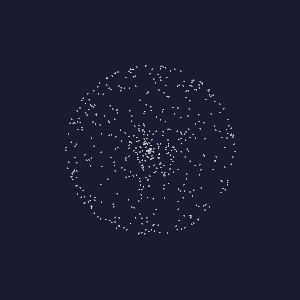

In [5]:
import numpy as np
import vtk
from IPython.display import Image

# Generate a point cloud for a sphere
num_points = 500
theta = np.random.uniform(0, 2 * np.pi, num_points)  # angles for spherical coordinates
phi = np.random.uniform(0, np.pi, num_points)

# Radius of the sphere
r = 50

# Convert spherical coordinates to Cartesian
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Create points in VTK
points = vtk.vtkPoints()
for i in range(num_points):
    points.InsertNextPoint(x[i], y[i], z[i])

# Create polydata object
poly_data = vtk.vtkPolyData()
poly_data.SetPoints(points)

# Create a vertex glyph to represent each point
vertex_filter = vtk.vtkVertexGlyphFilter()
vertex_filter.SetInputData(poly_data)
vertex_filter.Update()

# Mapper and actor for rendering
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(vertex_filter.GetOutput())

actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Create renderer and render window
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(0.1, 0.1, 0.2)

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetOffScreenRendering(1)

# Render and capture the image
render_window.Render()
window_to_image = vtk.vtkWindowToImageFilter()
window_to_image.SetInput(render_window)
window_to_image.Update()

# Write to memory and display
writer = vtk.vtkPNGWriter()
writer.SetInputConnection(window_to_image.GetOutputPort())
writer.WriteToMemoryOn()
writer.Write()

png_data = memoryview(writer.GetResult()).tobytes()
Image(data=png_data)


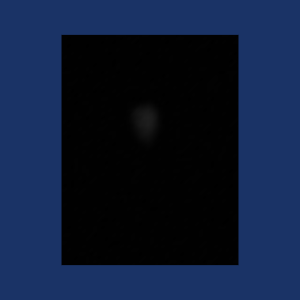

In [6]:
import vtk
from pyvista import examples
from IPython.display import Image

# Load an example dataset (human head)
data = examples.download_head()

# Create mapper and actor for rendering the volume
mapper = vtk.vtkDataSetMapper()
mapper.SetInputData(data)

actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Create a renderer and render window
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(0.1, 0.2, 0.4)

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetOffScreenRendering(1)

# Render and capture the image
render_window.Render()
window_to_image = vtk.vtkWindowToImageFilter()
window_to_image.SetInput(render_window)
window_to_image.Update()

# Write to memory and display
writer = vtk.vtkPNGWriter()
writer.SetInputConnection(window_to_image.GetOutputPort())
writer.WriteToMemoryOn()
writer.Write()

png_data = memoryview(writer.GetResult()).tobytes()
Image(data=png_data)


## Exercise: Exploring Isosurfaces, Volume Rendering, and Streamlines in VTK

In this exercise, you will explore three different visualization techniques in VTK: **Isosurface**, **Volume Rendering**, and **Streamlines**.

1. **Isosurface**: An isosurface represents a 3D surface that connects points of equal scalar value in a volume. We will use synthetic scalar data to visualize an isosurface.
   
2. **Volume Rendering**: This technique allows for visualizing volumetric data by assigning color and opacity to different regions of the volume. We will render a simple synthetic dataset.
   
3. **Streamlines**: Streamlines are used to visualize flow data. We will simulate a flow field and use streamlines to trace the movement of particles in this field.

### Your Task:
- Run the provided examples and experiment with different parameters (e.g., isosurface values, opacity in volume rendering, seed points for streamlines). Observe the effects these changes have on the rendered output.


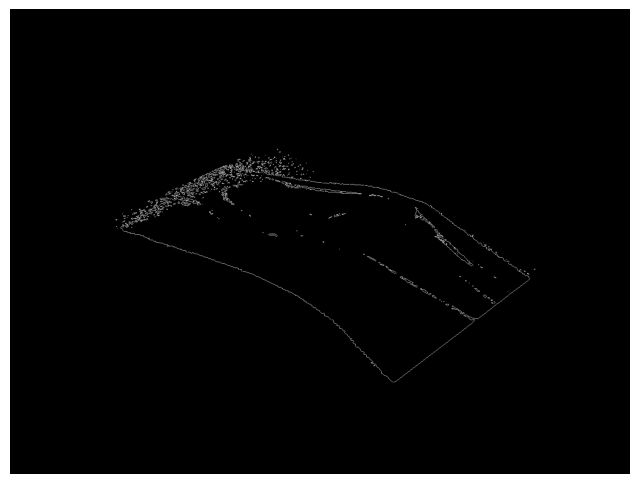

In [7]:

# Import PyVista and start Xvfb for off-screen rendering
import pyvista as pv
pv.start_xvfb()

# Generate synthetic scalar data (as before)
grid = pv.examples.download_knee()

# Contour (Isosurface)
contour = grid.contour([300])  # Define isosurface value

# Create a plotter for off-screen rendering
plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(contour, color="white", opacity=0.6)
plotter.background_color = "black"

# Render and save the image
plotter.show(screenshot="isosurface_vtk_pyvista.png")

# Display the image using Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("isosurface_vtk_pyvista.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


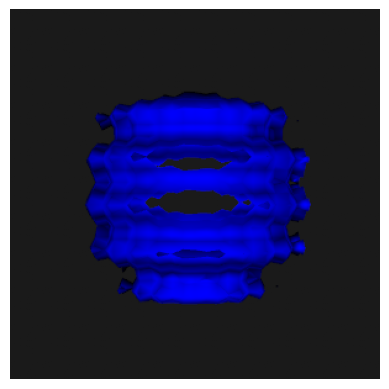

In [8]:
import vtk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate synthetic scalar data
data_source = vtk.vtkRTAnalyticSource()
data_source.Update()

# Contour (Isosurface)
contour = vtk.vtkContourFilter()
contour.SetInputConnection(data_source.GetOutputPort())
contour.SetValue(0, 150)  # Isosurface value
contour.Update()

# Create a mapper
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(contour.GetOutputPort())

# Create an actor
actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Create a renderer and render window (off-screen)
renderer = vtk.vtkRenderer()
render_window = vtk.vtkRenderWindow()
render_window.OffScreenRenderingOn()  # Enable off-screen rendering
render_window.AddRenderer(renderer)

# Add the actor to the scene
renderer.AddActor(actor)
renderer.SetBackground(0.1, 0.1, 0.1)  # Set background color

# Render the scene
render_window.Render()

# Use vtkWindowToImageFilter to capture the rendered image
window_to_image_filter = vtk.vtkWindowToImageFilter()
window_to_image_filter.SetInput(render_window)
window_to_image_filter.Update()

# Write the captured image to a PNG file
writer = vtk.vtkPNGWriter()
writer.SetFileName("isosurface_rendered.png")
writer.SetInputConnection(window_to_image_filter.GetOutputPort())
writer.Write()

# Load and display the saved image
img = mpimg.imread("isosurface_rendered.png")
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


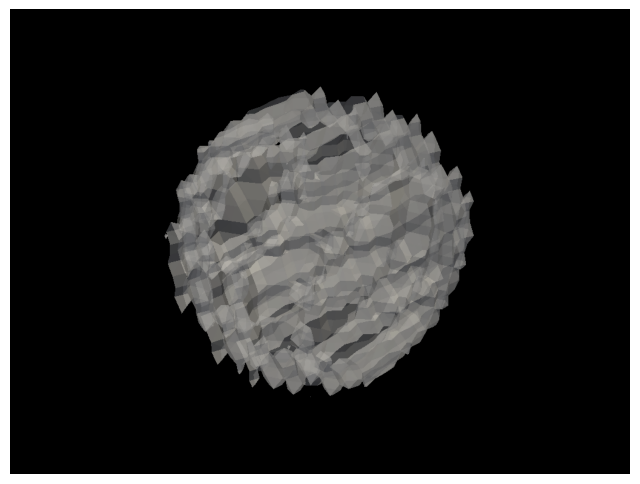

In [9]:
# Import PyVista and start Xvfb for off-screen rendering
import pyvista as pv
pv.start_xvfb()

# Generate synthetic scalar data using RTAnalyticSource (similar to vtkRTAnalyticSource)
grid = pv.Wavelet()  # PyVista's equivalent for generating volumetric data

# Contour (Isosurface)
contour = grid.contour([150])  # Define isosurface value

# Create a plotter for off-screen rendering
plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(contour, color="white", opacity=0.6)
plotter.background_color = "black"

# Render and save the image
plotter.show(screenshot="isosurface_vtk_pyvista.png")

# Display the image using Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("isosurface_vtk_pyvista.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


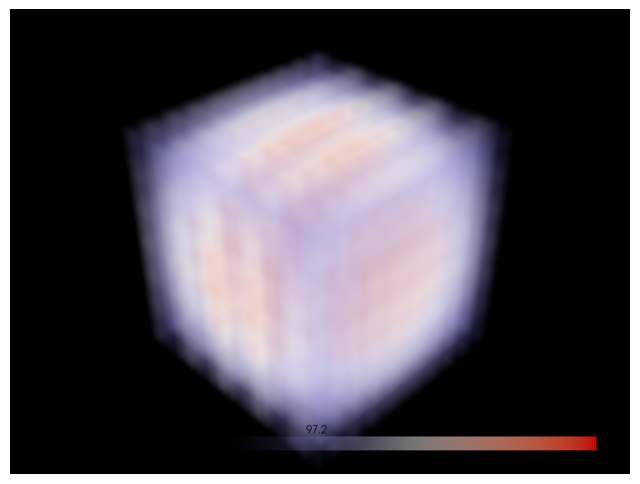

In [10]:

# Import PyVista and start Xvfb for off-screen rendering
import pyvista as pv
pv.start_xvfb()

# Generate synthetic scalar data using RTAnalyticSource (similar to vtkRTAnalyticSource)
grid = pv.Wavelet()  # PyVista's equivalent for generating volumetric data

# Set up the plotter
plotter = pv.Plotter(off_screen=True)

# Add the volume data to the plotter with specific opacity and color mapping
opacity = [0.0, 0.5, 1.0]  # Define opacity for different scalar values
plotter.add_volume(grid, cmap="coolwarm", opacity=opacity)

# Set background color and render the scene
plotter.background_color = "black"
plotter.show(screenshot="volume_rendering.png")

# Display the image using Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("volume_rendering.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


## Explanation: Isosurfaces, Volume Rendering, and Streamlines

### 1. **Isosurfaces**:
- Isosurfaces connect points in a 3D dataset that have the same scalar value. By adjusting the scalar value (e.g., `SetValue(0, 150)`), we change the position of the surface, which can reveal different internal structures.
- This technique is often used in medical imaging to extract surfaces from MRI or CT scans.

### 2. **Volume Rendering**:
- Volume rendering allows us to visualize volumetric data by assigning opacity and color to different parts of the volume. The opacity transfer function (`opacity_function.AddPoint()`) determines which parts of the volume are more transparent and which are more opaque. The color transfer function (`color_function.AddRGBPoint()`) controls the color mapping.
- This technique is useful for visualizing 3D scalar fields like temperature or density.

### 3. **Streamlines**:
- Streamlines visualize the flow of a vector field, tracing the path a particle would take through the field. By setting the start position and adjusting the maximum propagation distance (`streamline_data.SetMaximumPropagation(200)`), we can control how far the streamlines propagate in the field.
- Streamlines are widely used in fluid dynamics and airflow simulations to visualize flow patterns.

By experimenting with different parameters (isosurface values, color/opacity in volume rendering, and start positions in streamlines), you can understand how these techniques highlight different aspects of the data.


-----
-----
-----

##Answer to the GnuPlot exercise

Here are the modified Gnuplot commands reflecting the requested changes:


In [25]:
%%bash
gnuplot << EOF
    # Set the terminal to PNG for saving images
    set terminal png;

    # Plot 1: Using columns 1 and 2 from the data file
    set output 'plot1.png';
    plot 'gnu_example.dat' using 1:2 with points title 'Data: 1 vs 2';

    # Plot 2: Using columns 1 and 3 from the data file
    set output 'plot2.png';
    plot 'gnu_example.dat' using 1:3 with points title 'Data: 1 vs 3';

    # Plot 3: Data and sin(x) with expanded range
    set output 'plot3.png';
    plot [0:5][-10:10] 'gnu_example.dat' using 1:2 with points title 'data', sin(x) title 'sin(x)';

    # 3D Plot: Data with Gaussian function
    set output 'splot.png';
    splot 'gnu_example.dat' with points title 'data', 10+exp(-(x-3)**2-(y-3)**2) title 'gaussian';
EOF



Answer:  Explanation of Changes:

Plot Style Changed to with points:

Replaced with linespoints with with points in all plot commands.
This displays only the individual data points without connecting lines, highlighting the discrete nature of the data.
Data Columns Adjusted in plot2.png:

Changed using 3:2 to using 1:3.
Now, the first column is plotted on the x-axis and the third column on the y-axis, allowing you to explore different relationships within your data.
Plot Range Modified in plot3.png:

Updated the range to plot [0:5][-10:10].
This expands the x-axis to 5 and the y-axis to range from -10 to 10, providing a broader view of the sin(x) function alongside your data.
After re-running the code with these modifications, you should observe:

Plot 1 (plot1.png): Data points are displayed without connecting lines, offering a clearer view of individual measurements.
Plot 2 (plot2.png): A new plot that reveals the relationship between the first and third data columns.
Plot 3 (plot3.png): An expanded plot range that shows more oscillations of the sin(x) function and how it correlates with your data over a wider interval.

## Answer: Explanation of the Changes

Here are the expected effects after making the modifications in the code:

1. **Changing the Color of the Sphere**:
   - If you changed the RGB values (e.g., to `0.0, 0.0, 1.0`), you would see the sphere rendered in blue. RGB values correspond to the Red, Green, and Blue channels, and changing these values will directly impact the color of the sphere.

2. **Modifying the Sphere’s Radius**:
   - Changing the radius of the sphere (e.g., to `2.0`) will make the sphere smaller, while a larger value (e.g., `8.0`) will increase the size. This directly impacts the scale of the geometry in the 3D space.

3. **Adjusting the Camera Position**:
   - Modifying the camera position (e.g., to `(10, 10, 20)`) will change the perspective from which you view the sphere. The camera can be moved to any position in 3D space, allowing you to view the object from above, below, or from the sides.

4. **Experimenting with the Background Color**:
   - If you change the background color (e.g., to a darker value like `0.2, 0.2, 0.2`), you will notice a stronger contrast with the green or blue sphere. Choosing a background color that contrasts with the sphere’s color can help the object stand out more clearly.

By making these simple changes, you can see how each modification affects the visualization. This exercise demonstrates the
